In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from torchvision import datasets
from os.path import expanduser
import seaborn as sns



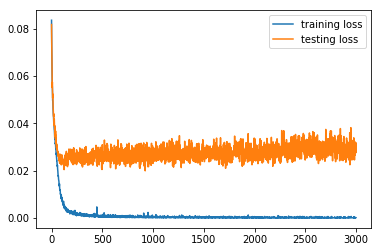

In [13]:
home = expanduser("~")
#test
##boston
#data_root = home+'/data/streetContext/streetImages/Boston/modelRelated/data/resnet/'
#path_to_logfiles=home+'/data/streetContext/streetImages/Boston/modelRelated/logfiles/resnet18_check/';

##San Francisco
data_root = home+'/data/streetContext/streetImages/SF/modelRelated/data/resnetPOI/';
path_to_logfiles=home+'/data/streetContext/streetImages/SF/modelRelated/logfiles/inceptionv3_poi/';


#%% read validation loss
infile=open(path_to_logfiles+"validation_loss0.csv","r")
reader=csv.reader(infile)
validation_loss=[float(i) for i in list(reader)[0]]

#%% read training loss
infile=open(path_to_logfiles+"training_loss0.csv","r")
reader=csv.reader(infile)
training_loss=[float(i) for i in list(reader)[0]]

#%% plot the data

plt.plot(training_loss)
plt.plot(validation_loss)
plt.legend(['training loss','testing loss'])

plt.savefig(path_to_logfiles+"loss.png")
plt.show()

['Alley', 'Commercial Throughway', 'Downtown Commercial', 'Downtown Residential', 'HWY', 'HWY Ramp', 'Industrial', 'Neighborhood Commercial', 'Neighborhood Residential', 'Park Interior', 'Residential Throughway']


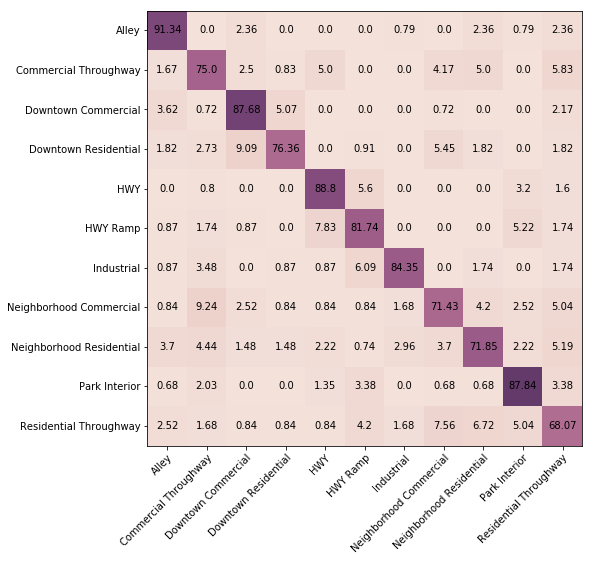

In [14]:

# %% confusion matrix part
train_dataset = datasets.ImageFolder(root=data_root+'/train')
labels_=list(train_dataset.class_to_idx)
infile=open(path_to_logfiles+"confusion_matrix0.csv","r")
reader=list(csv.reader(infile))
confmat_numpy=np.zeros([len(labels_),len(labels_)])
for i in range(len(reader)):
    for j in range(len(reader)):
        confmat_numpy[i,j]=float(reader[i][j])

cmap = sns.cubehelix_palette(dark=0.3, light=0.9, as_cmap=True)
# %%
fig,ax=plt.subplots(figsize=[8,8])
im=ax.imshow(confmat_numpy,cmap=cmap)

row_sum=np.sum(confmat_numpy,axis=1)

confmat_numpy_scaled=confmat_numpy;
for i in range(len(row_sum)):
    confmat_numpy_scaled[i,:]=    np.round((confmat_numpy_scaled[i,:]/row_sum[i]) *100,2)

print(list(train_dataset.class_to_idx))
ax.set_xticks(np.arange(len(labels_)))
ax.set_yticks(np.arange(len(labels_)))

ax.set_xticklabels(labels_)
ax.set_yticklabels(labels_)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(reader)):
    for j in range(len(reader)):
        text = ax.text(j, i, str(confmat_numpy[i, j]),
                       ha="center", va="center", color="k")
plt.savefig(path_to_logfiles+'confusionMatrix.pdf',dpi=300, bbox_inches = "tight")
#plt.savefig(path_to_logfiles+'confusion_matrix.png')
plt.show()


In [16]:
np.round(0.055,2)

0.06